In [1]:
%matplotlib inline

In [87]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import copy

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *


In [3]:
level = 4
basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
j = 0
for halo_number in [24]:  # range(1, 31):
    halodir = basedir+"halo_{0}/".format(halo_number)
    snappath = halodir+"output/"
    for snapnr in range(127,128,1):
        print("level   : {0}".format(level))
        print("halo    : {0}".format(halo_number))
        print("snapnr  : {0}".format(snapnr))
        print("basedir : {0}".format(basedir))
        print("halodir : {0}".format(halodir))
        print("snappath: {0}\n".format(snappath))
        s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[0,1,2,3,4,5], 
            haloid=0, galradfac=0.1, verbose=True) 

        # Clean negative and zero values of gmet to avoid RuntimeErrors
        # later on (e.g. dividing by zero)
        s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )
     

level   : 4
halo    : 24
snapnr  : 127
basedir : /hits/universe/GigaGalaxy/level4_MHD/
halodir : /hits/universe/GigaGalaxy/level4_MHD/halo_24/
snappath: /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/

[ 34.42281723  33.16259384  37.29567337]
Found 1783163 stars.
Rotated pos.
Rotated bfld.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]



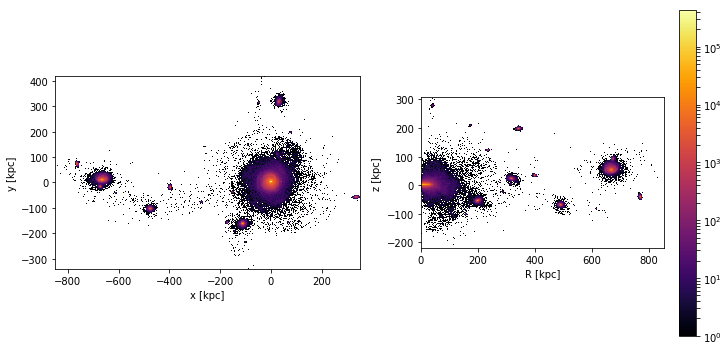

In [32]:
istars, = np.where( (s.type == 4) & (s.halo == 0) )#& (s.subhalo == 0))
(x, y, z), (vx, vy, vz), rxyz, rxy = get_cartesian_vectors(s, sf, istars)

binnum = 401
H1, xedges1, yedges1 = np.histogram2d(x, y, bins=binnum)
H2, xedges2, yedges2 = np.histogram2d(rxy, z, bins=binnum)
vmin = 1e0
if np.max(H1) > np.max(H2):
    vmax = np.max(H1)
else: vmax = np.max(H2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
h1 = ax1.hist2d(1000*x, 1000*y, bins=binnum, norm=matplotlib.colors.LogNorm(), cmap = 'inferno', vmin = vmin, vmax = vmax)
h2 = ax2.hist2d(1000*rxy, 1000*z, bins=binnum, norm=matplotlib.colors.LogNorm(), cmap = 'inferno', vmin = vmin, vmax= vmax)
ax1.set_xlabel("x [kpc]")
ax1.set_ylabel("y [kpc]")
ax1.set_aspect('equal')
ax2.set_xlabel("R [kpc]")
ax2.set_ylabel("z [kpc]")
ax2.set_aspect('equal')
cbar2 = fig.colorbar(h2[3], ax = ax2 )


/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


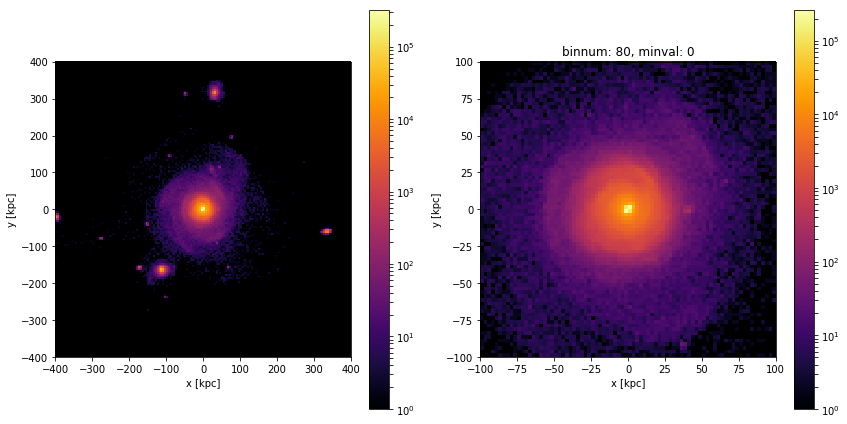

/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


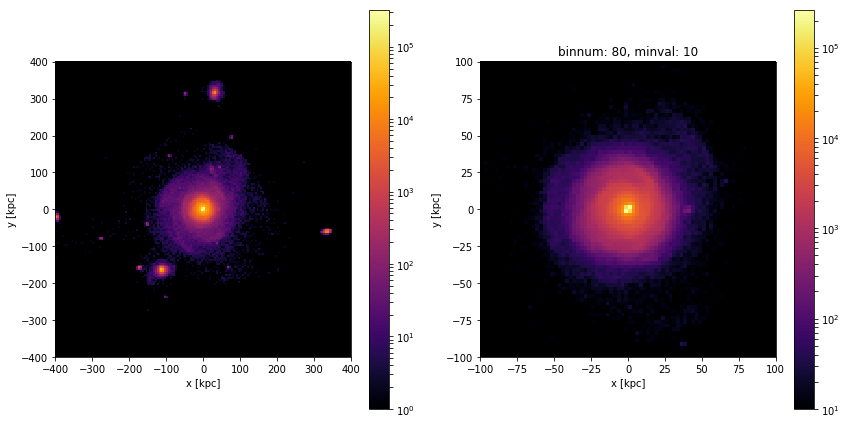

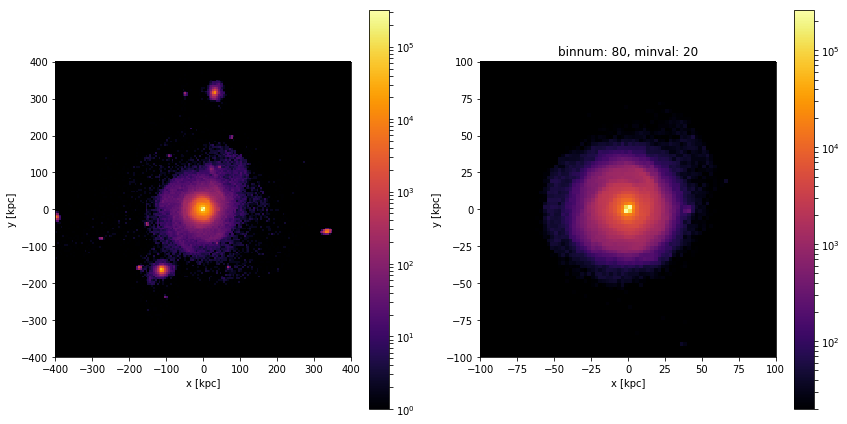

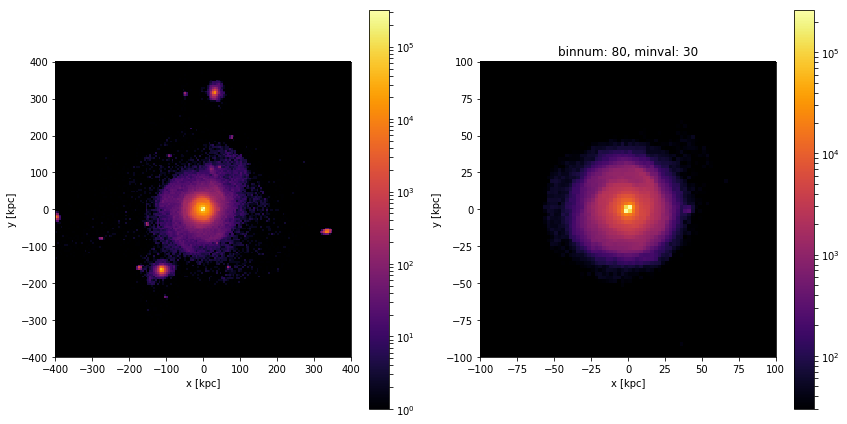

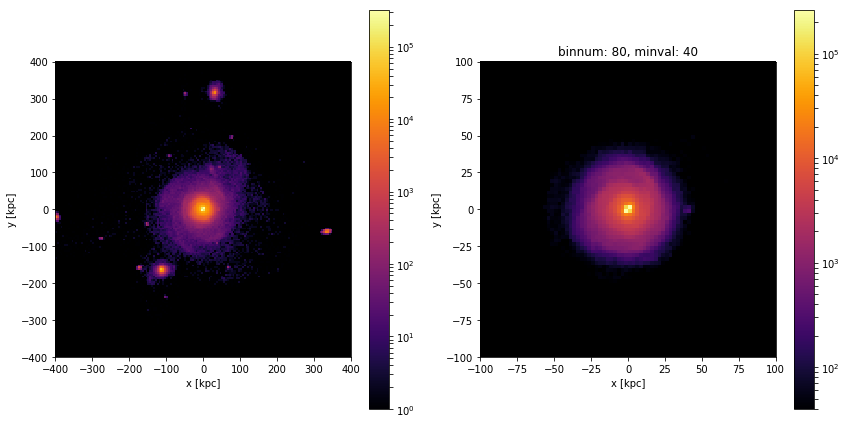

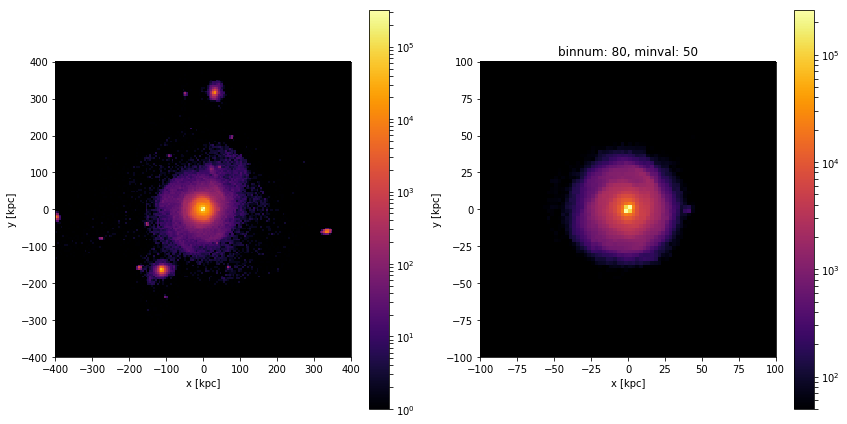

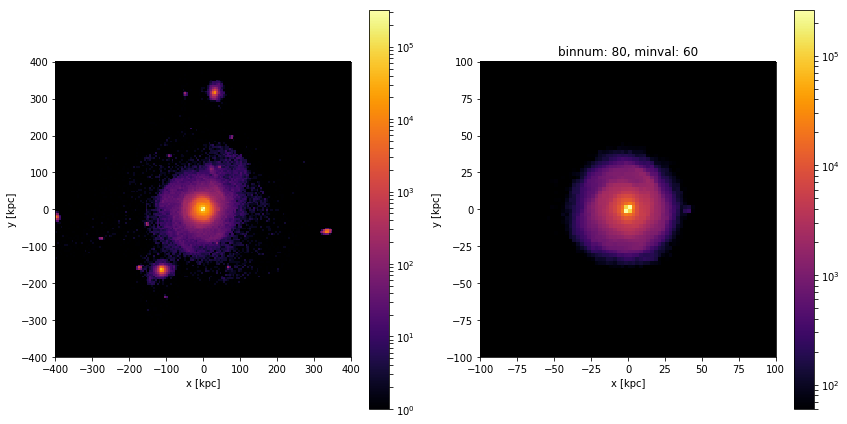

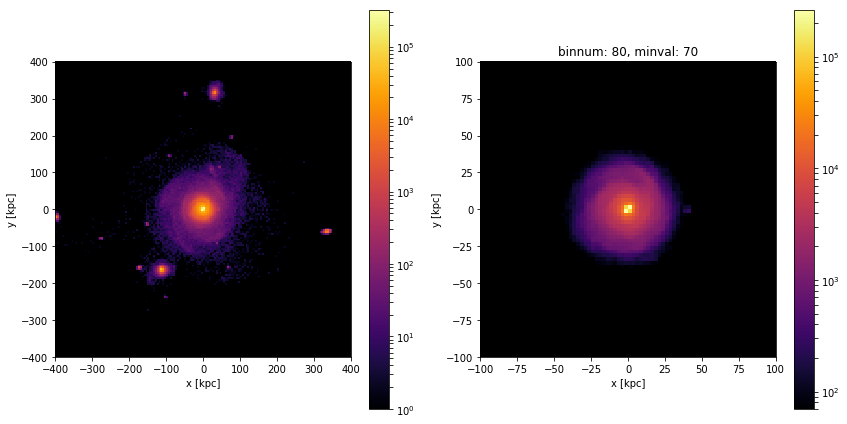

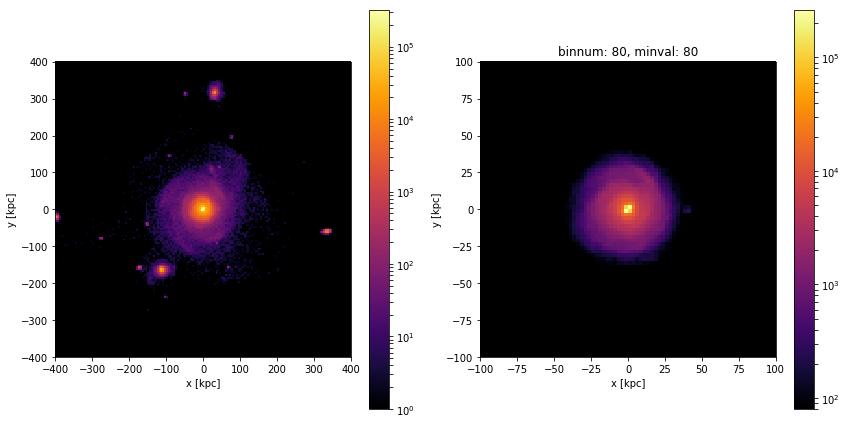

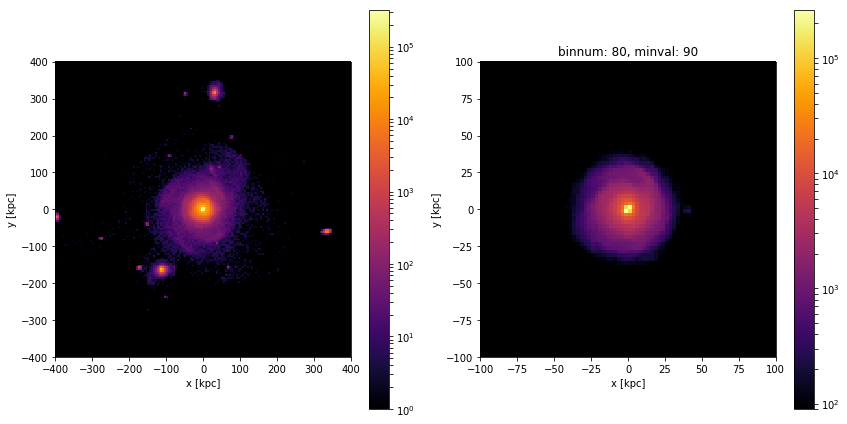

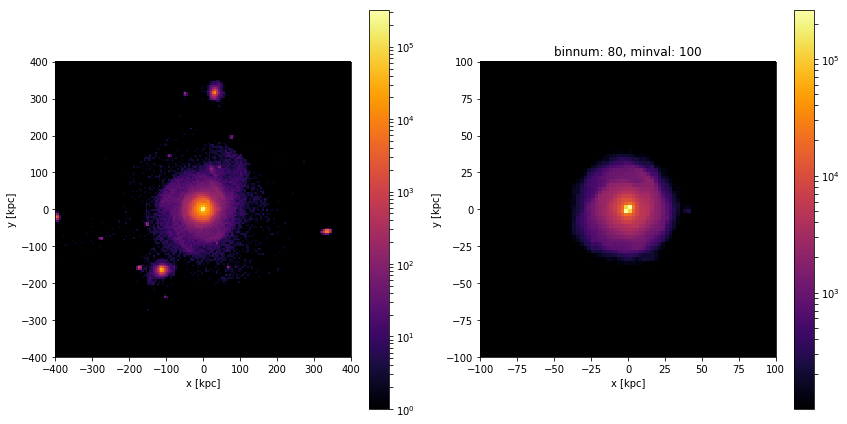

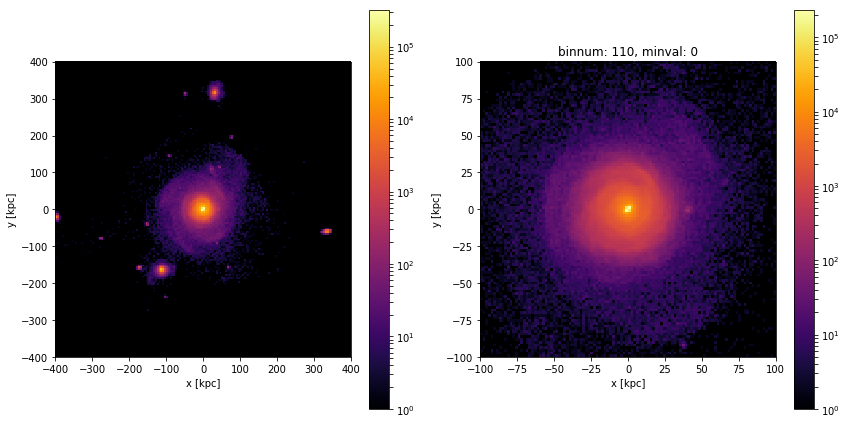

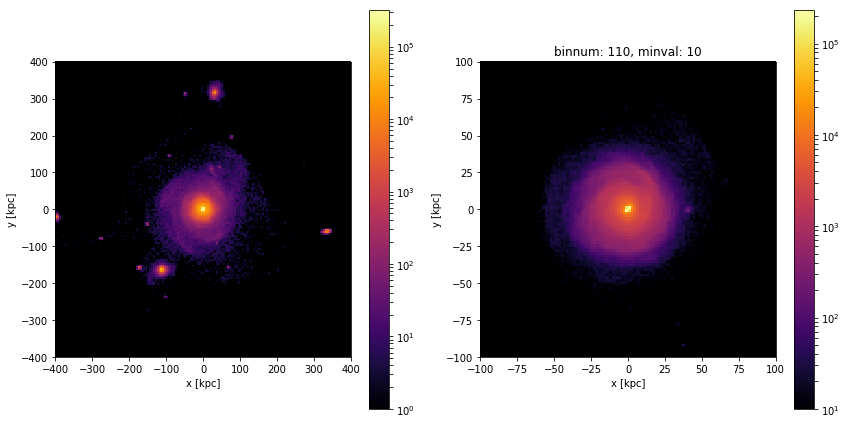

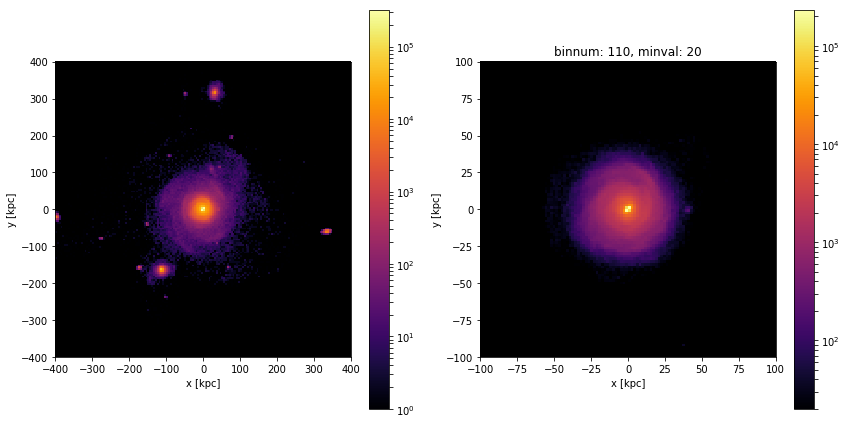

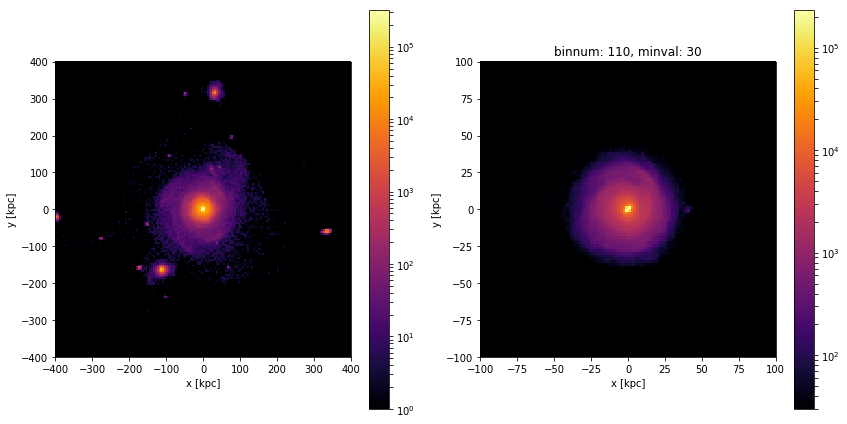

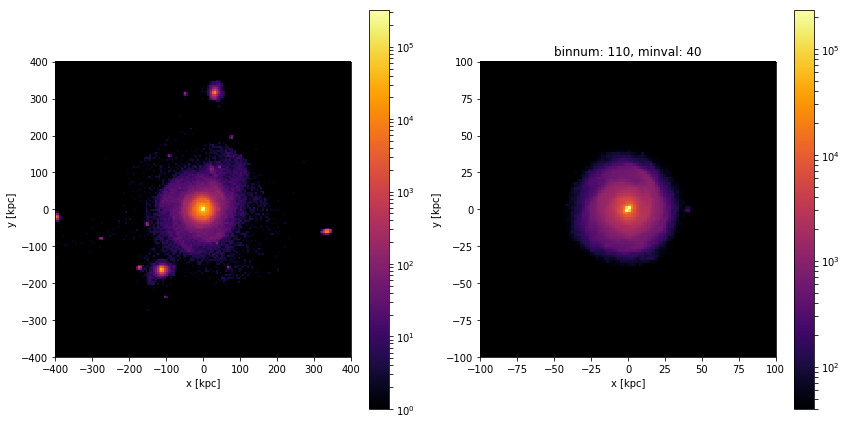

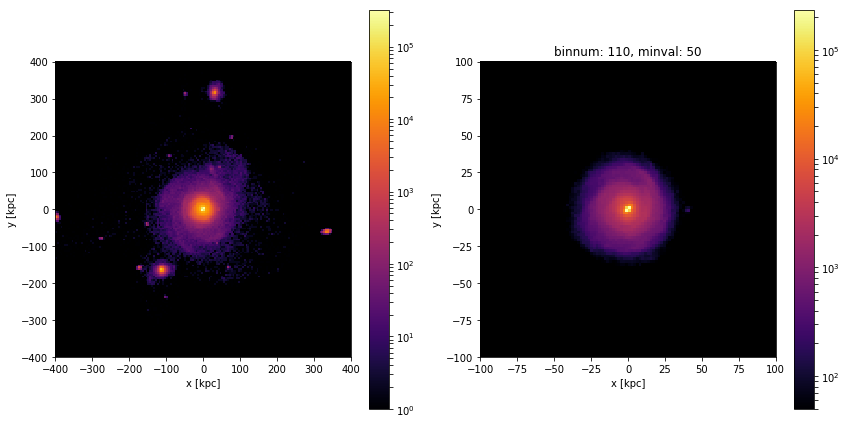

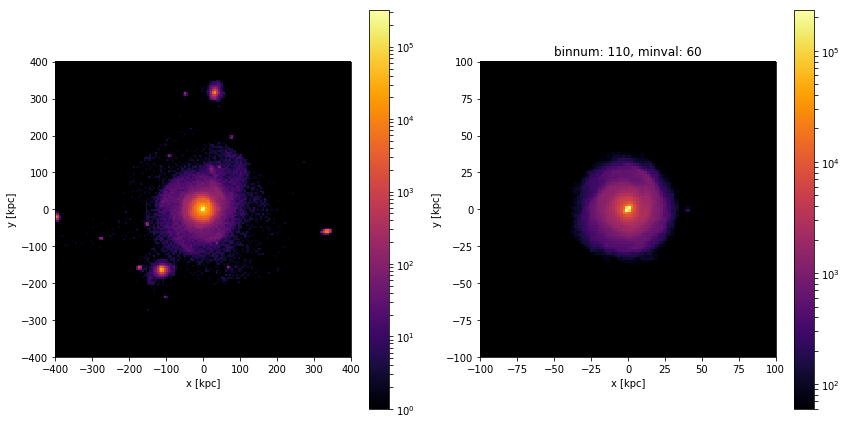

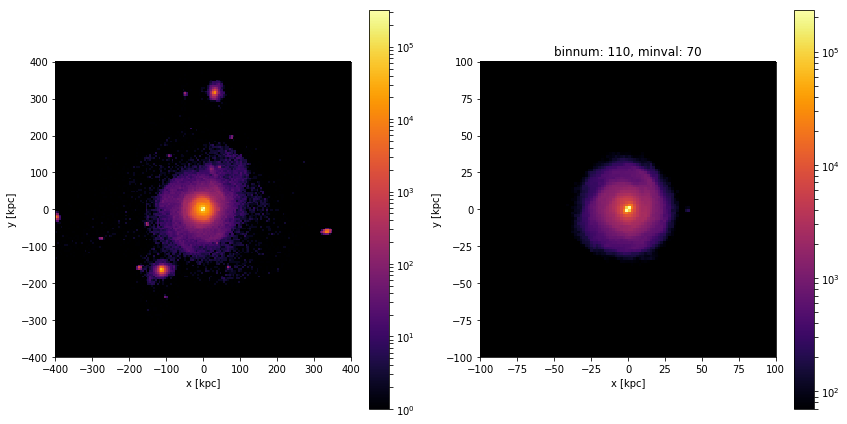

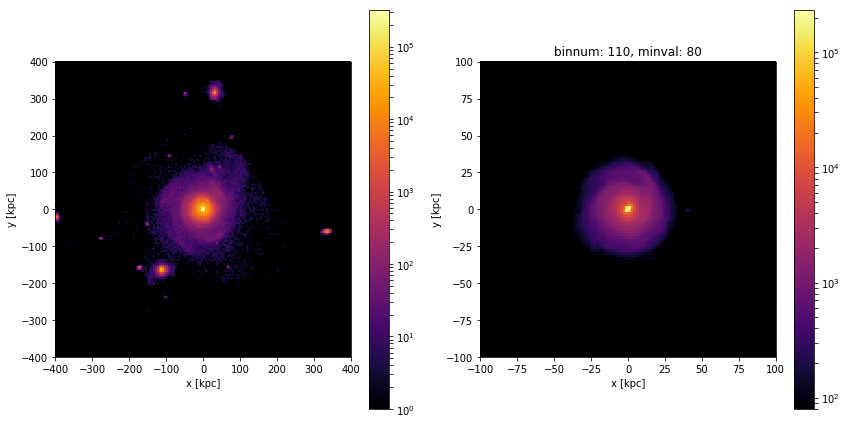

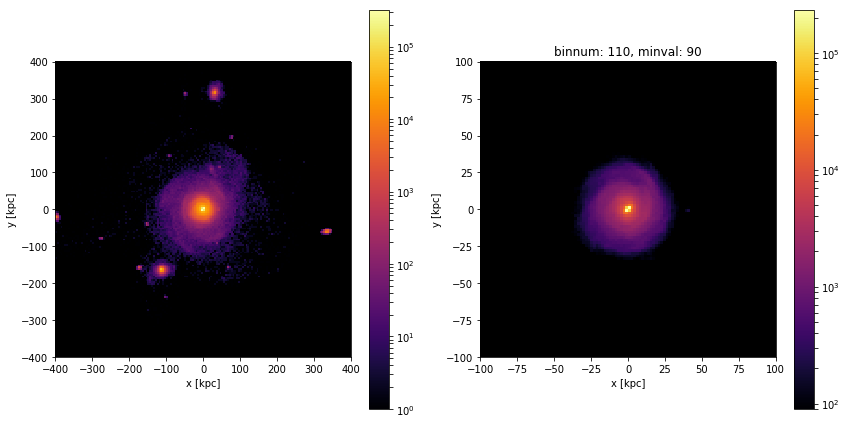

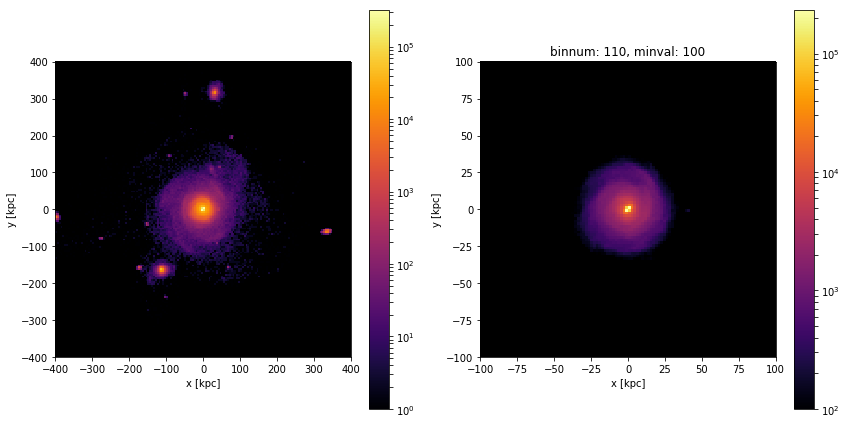

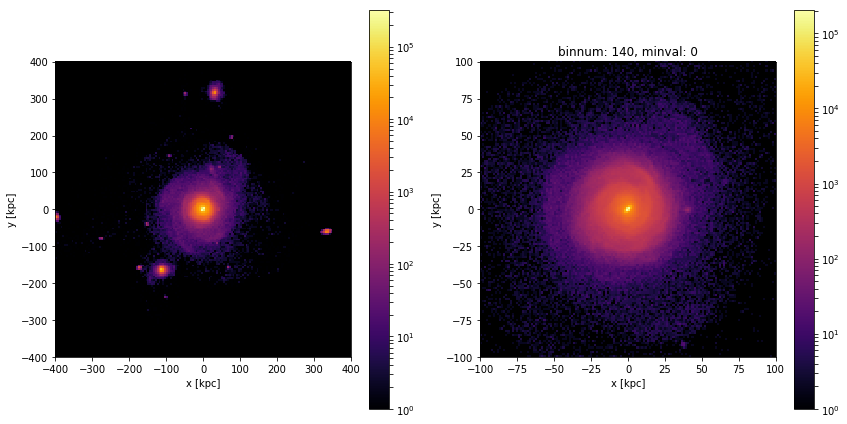

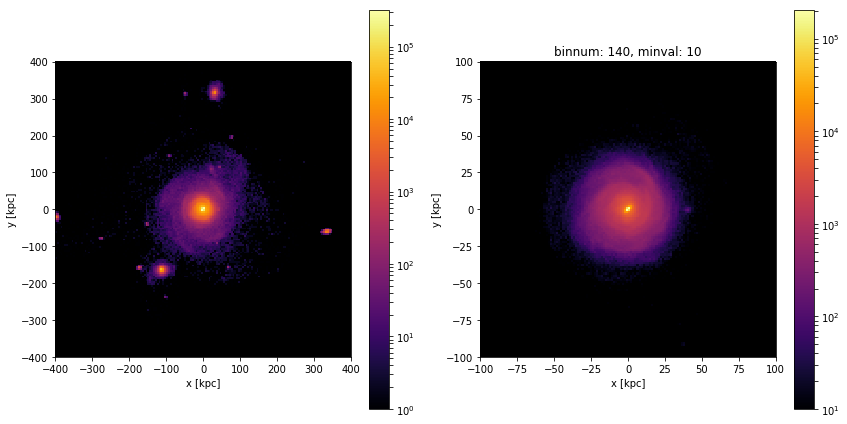

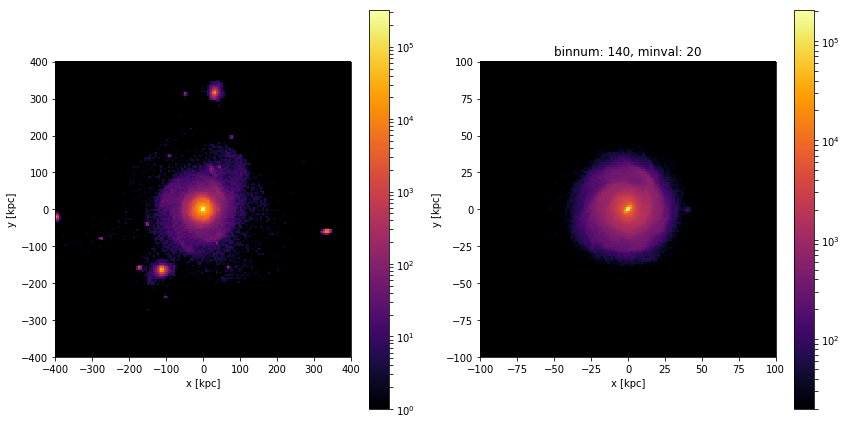

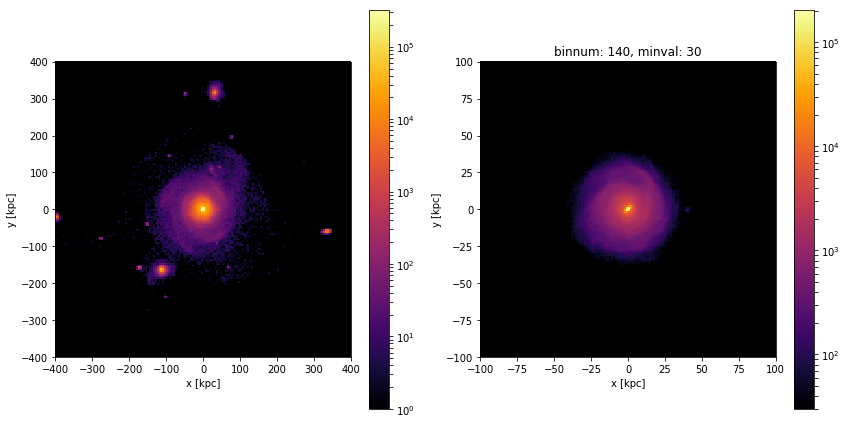

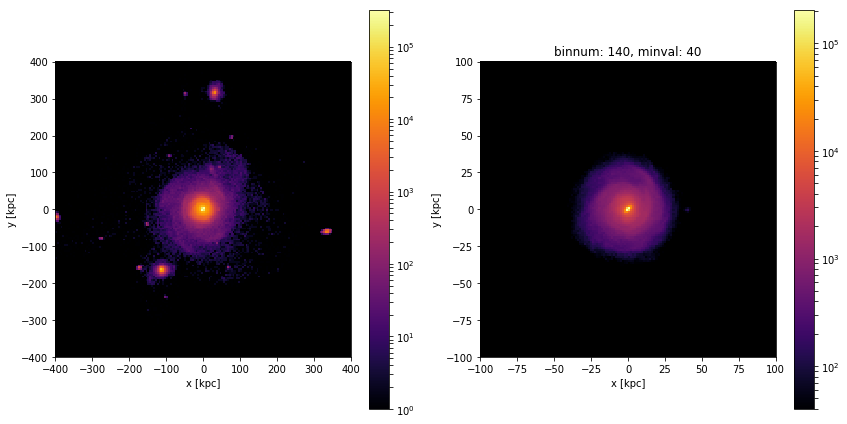

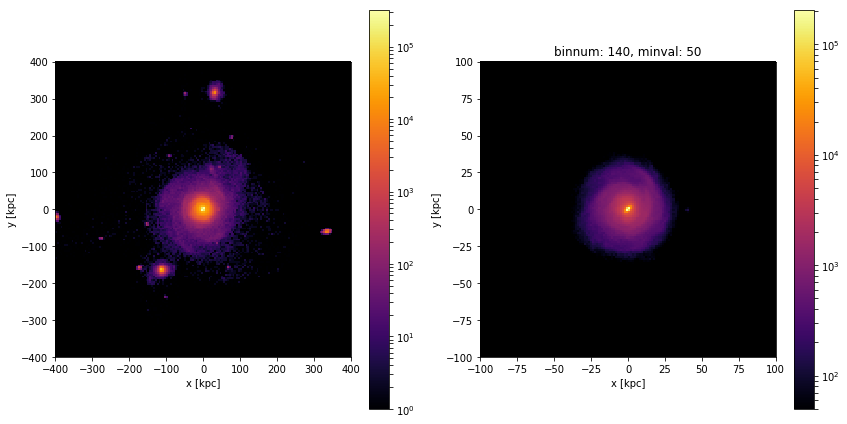

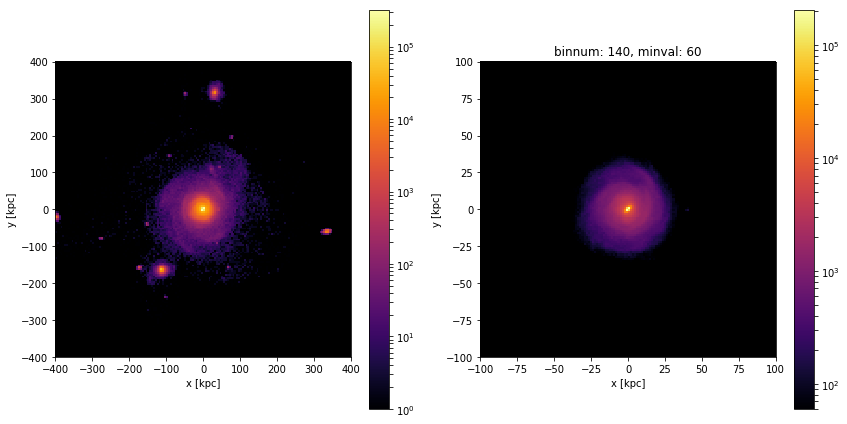

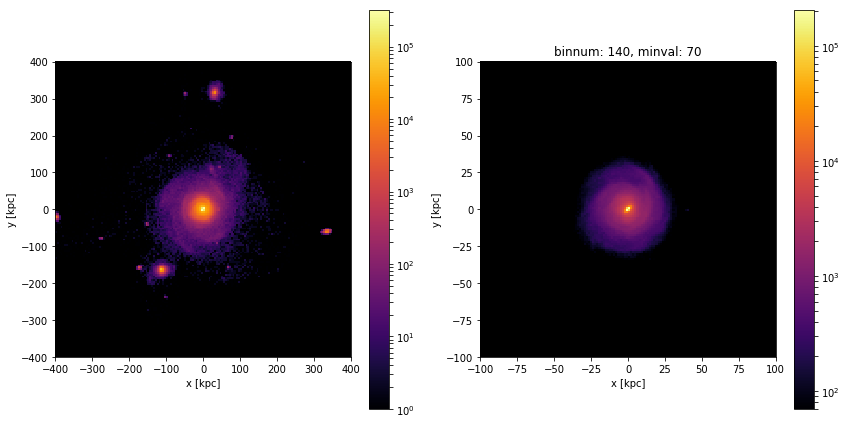

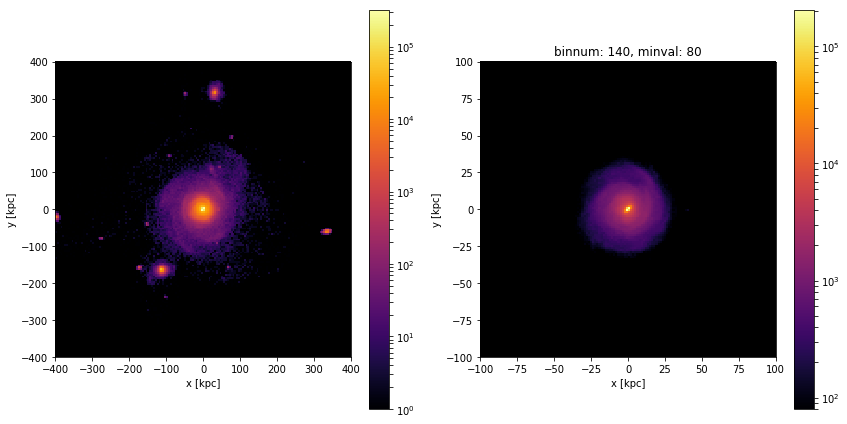

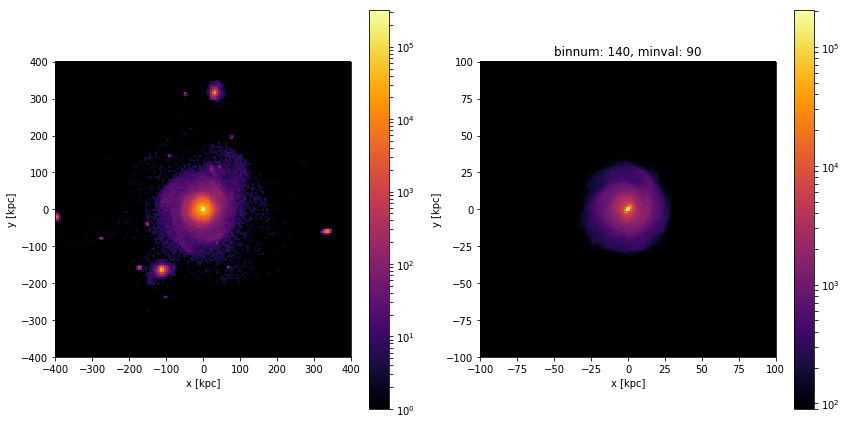

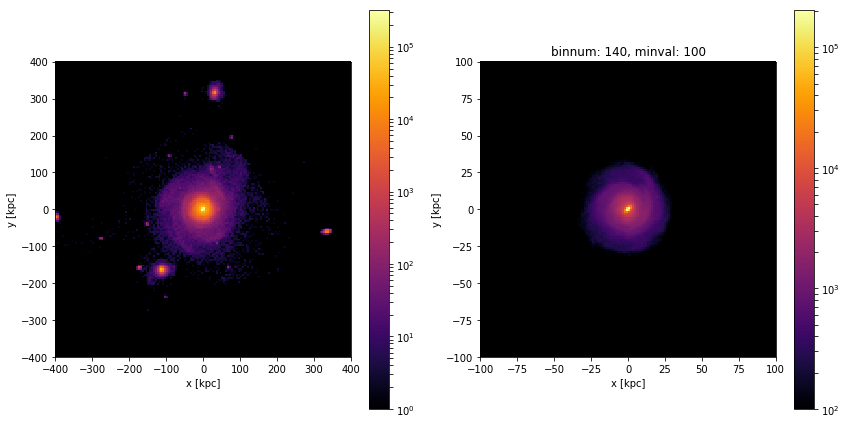

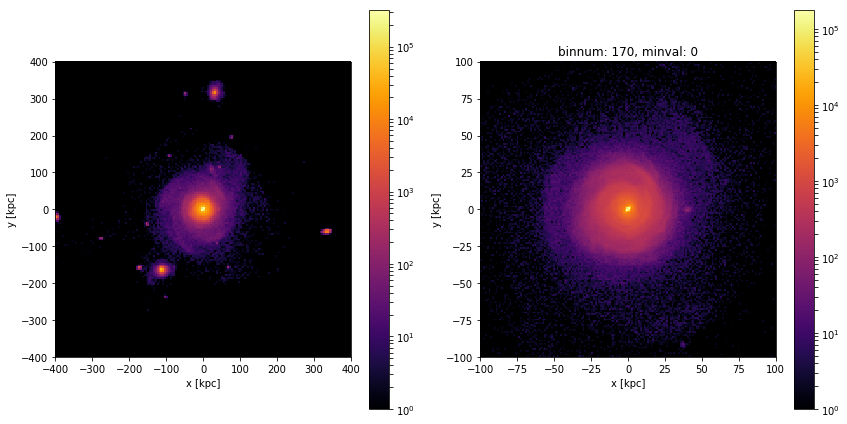

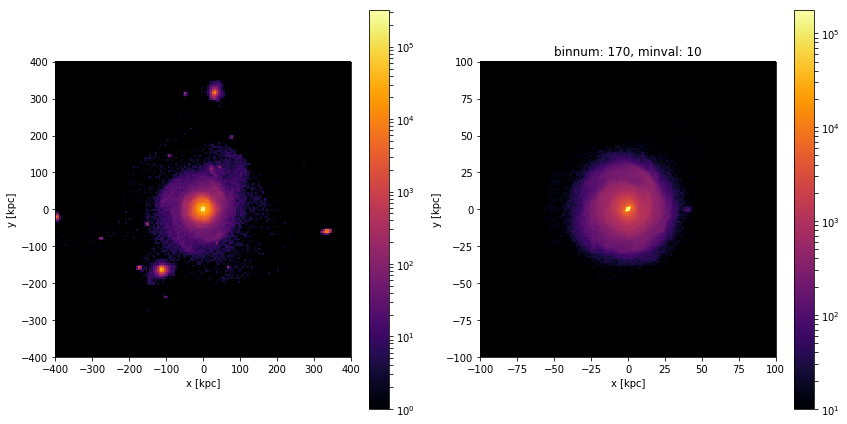

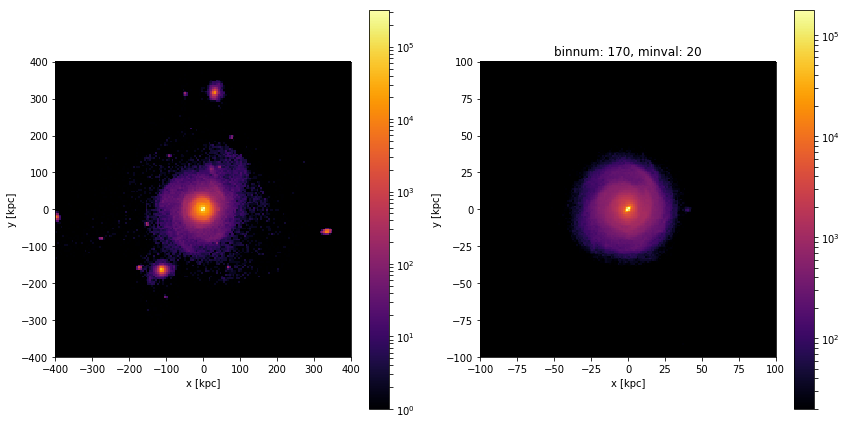

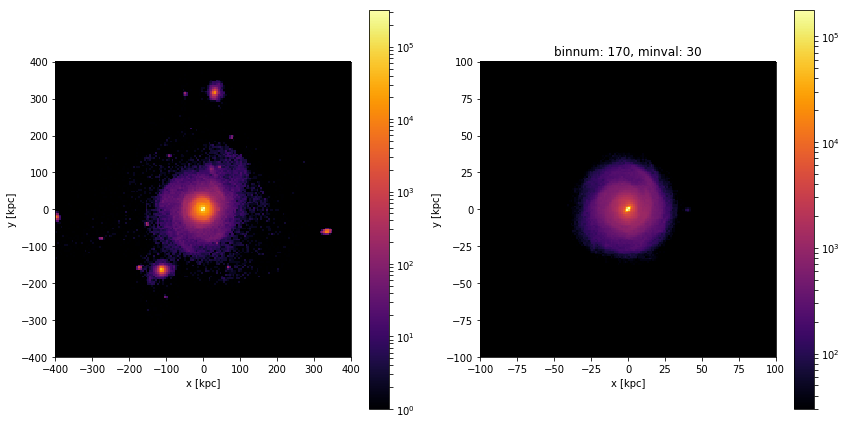

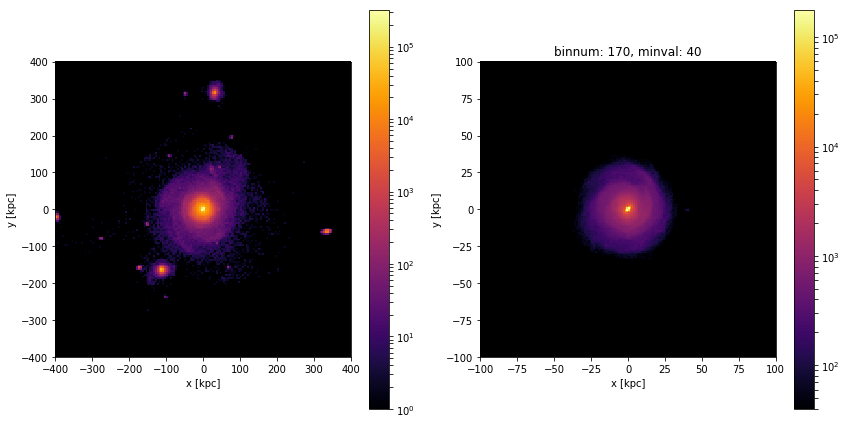

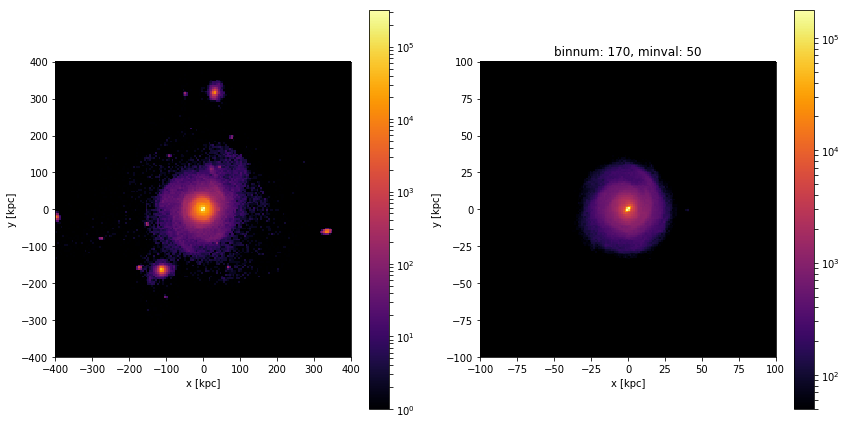

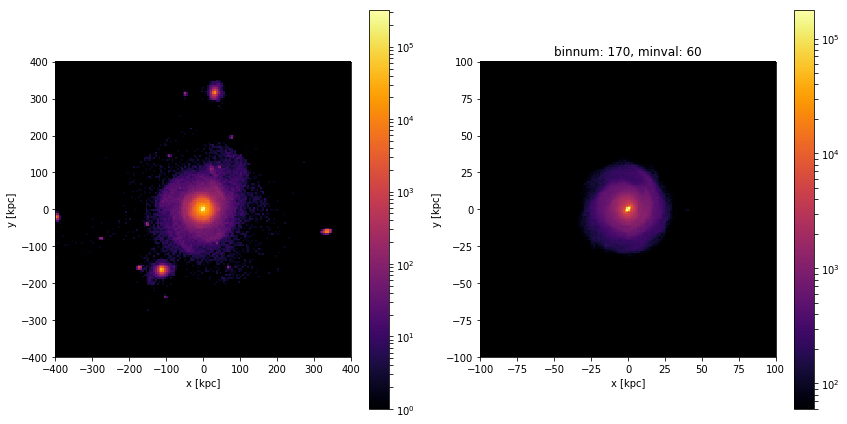

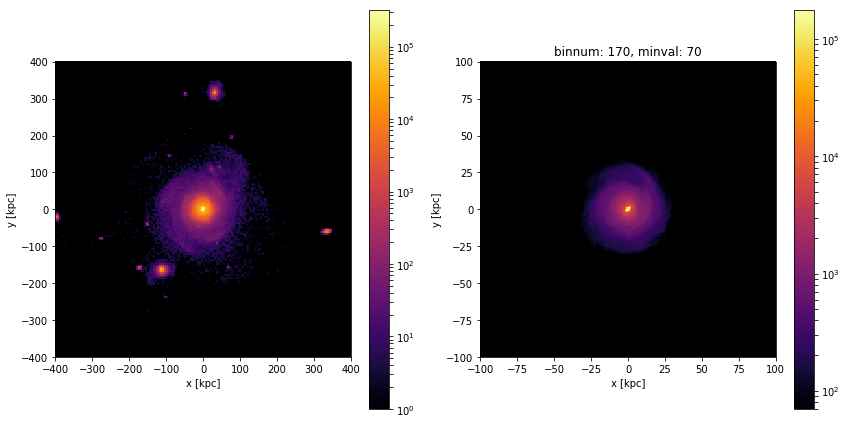

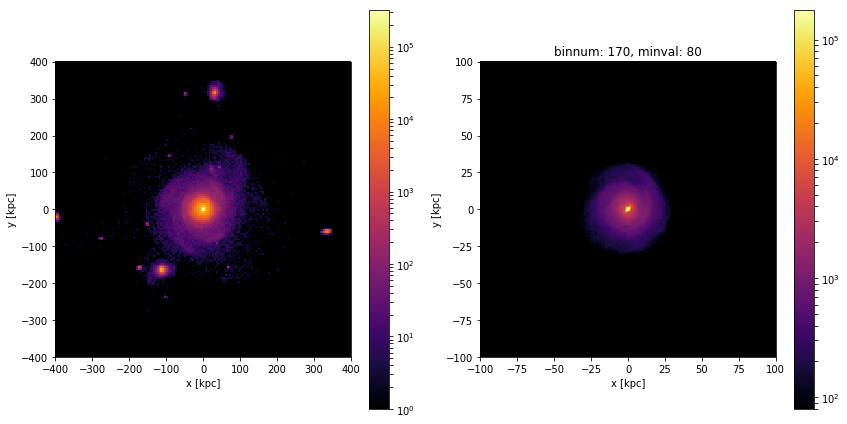

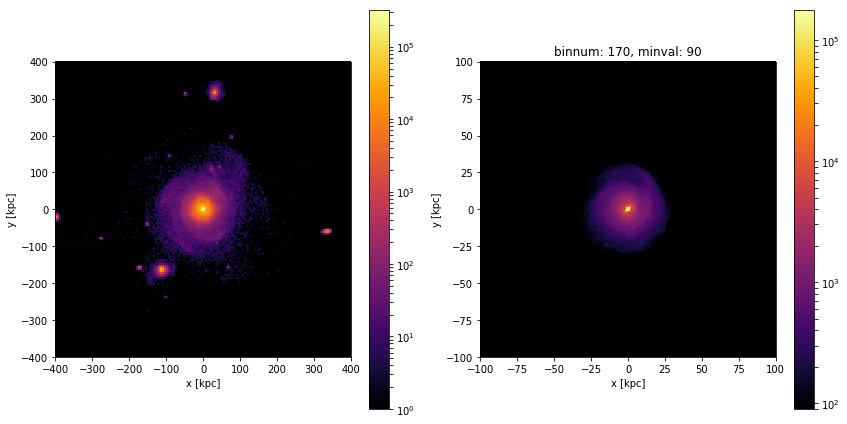

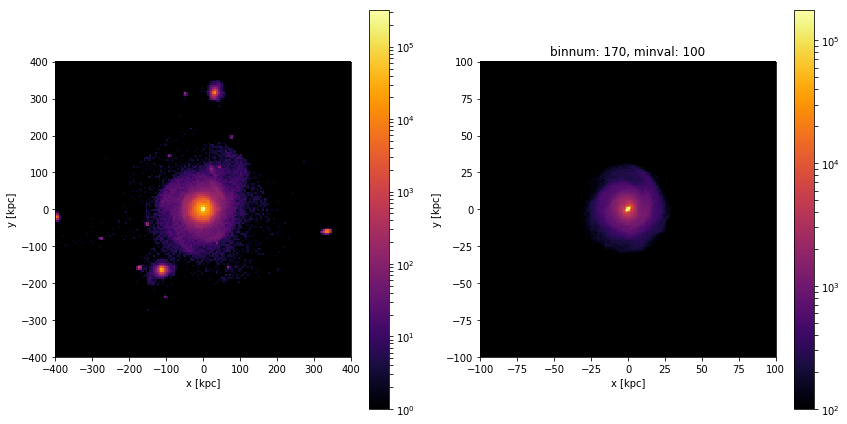

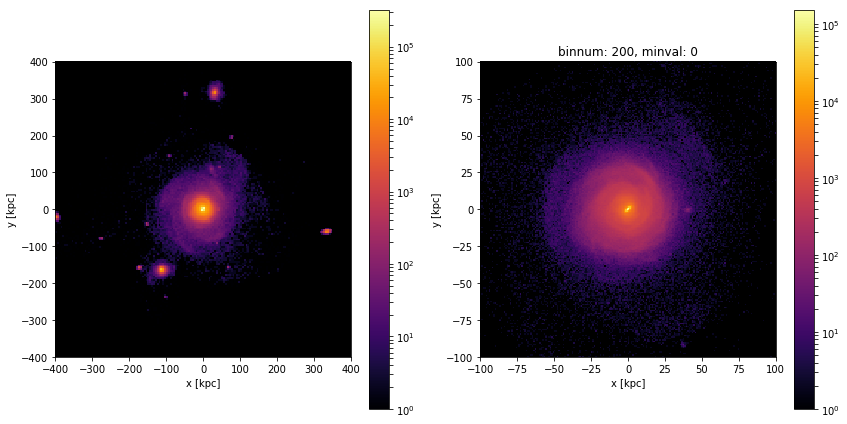

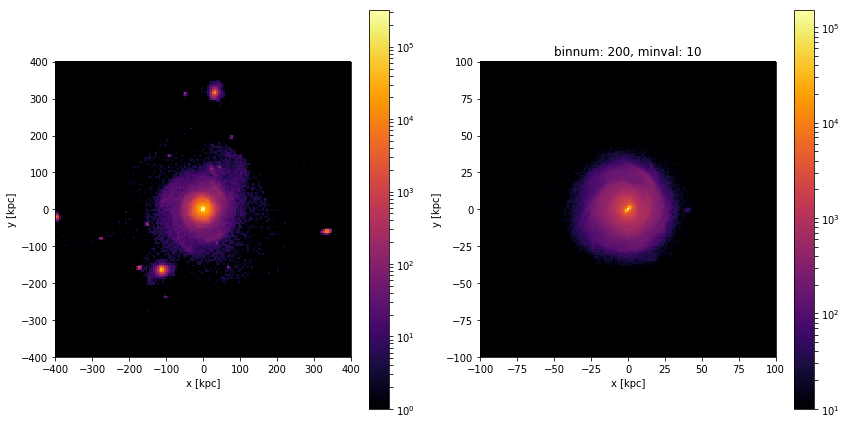

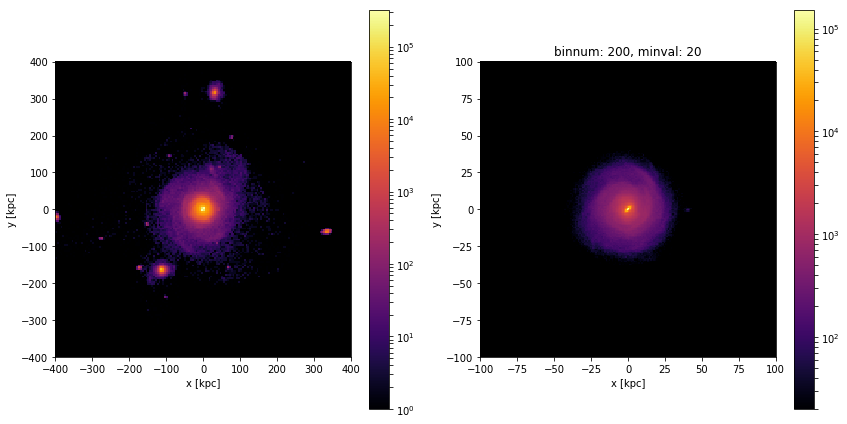

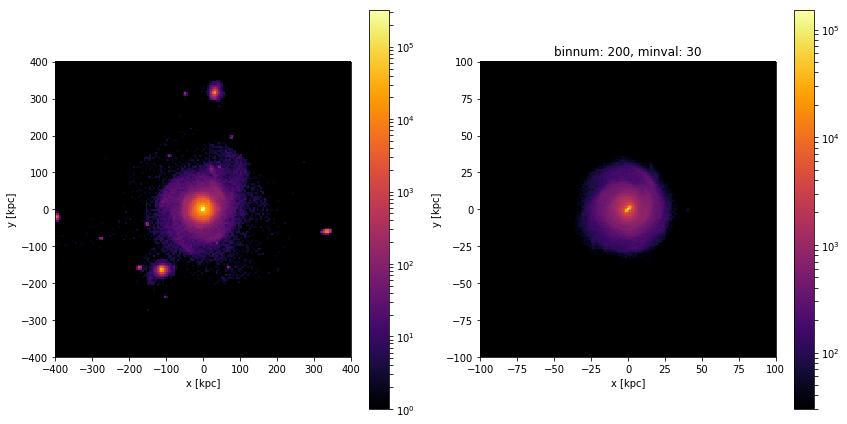

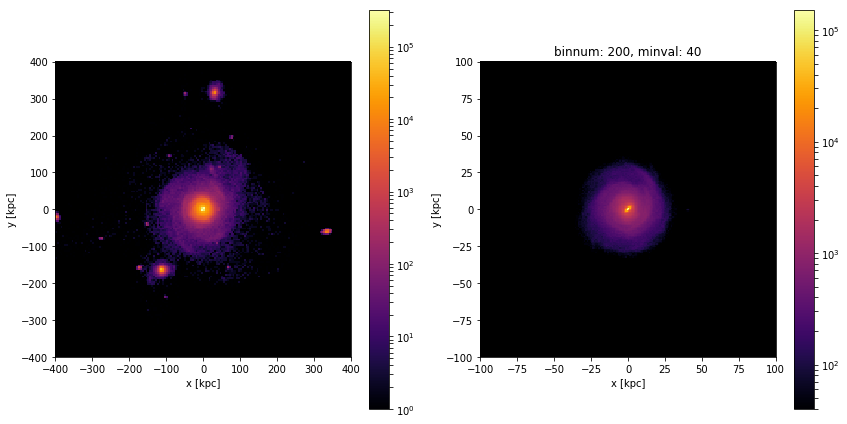

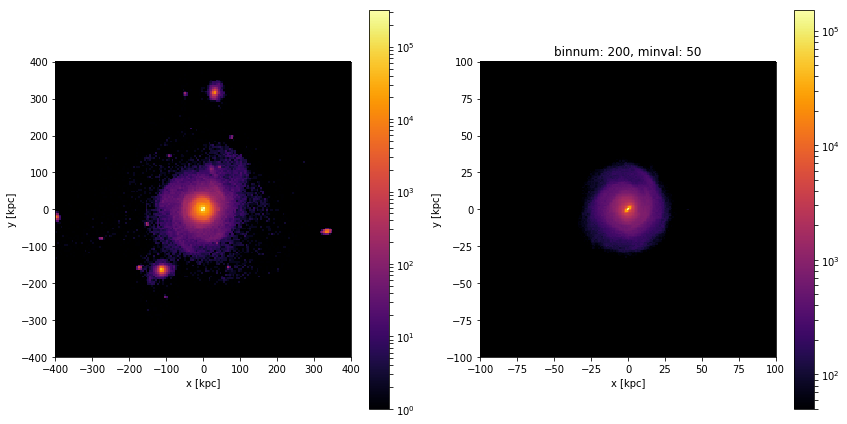

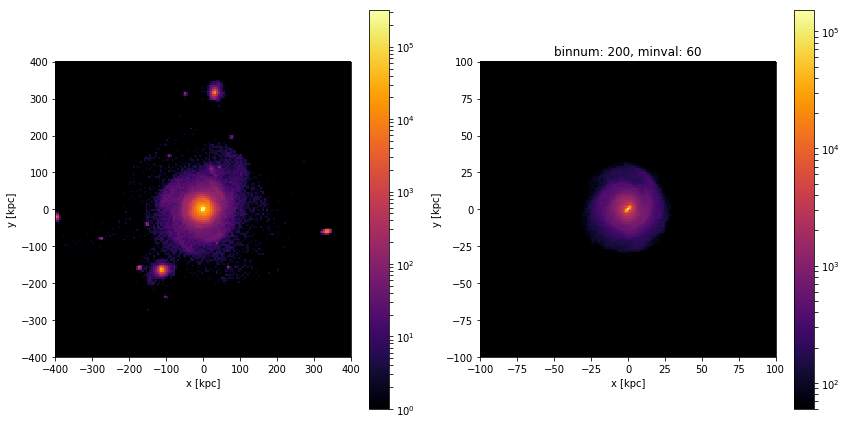

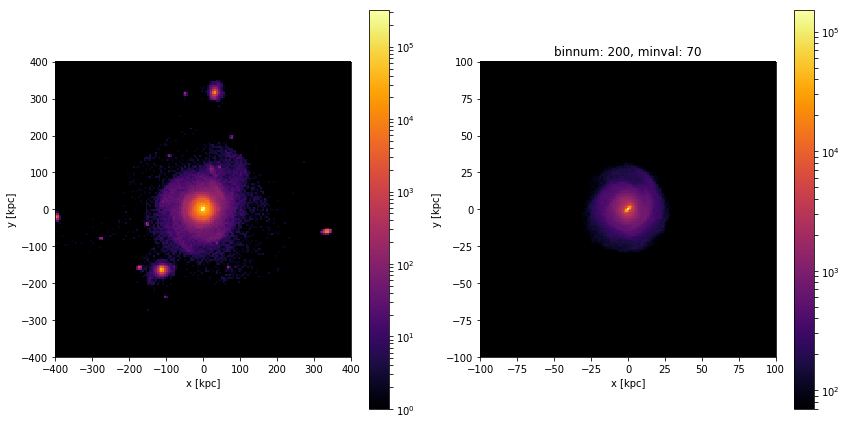

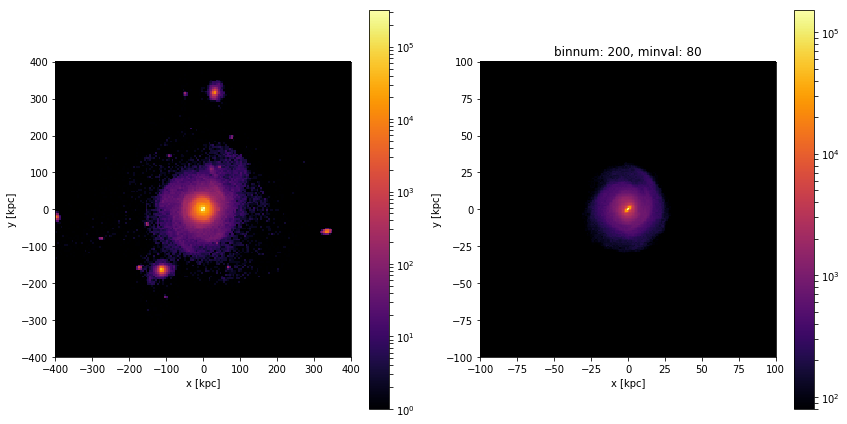

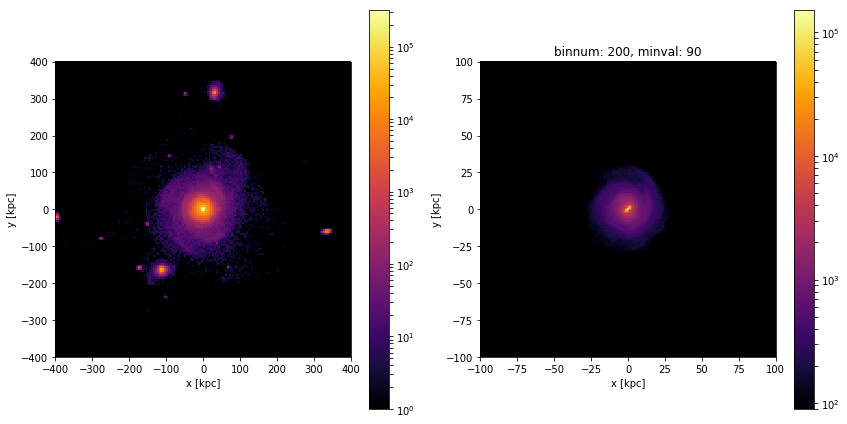

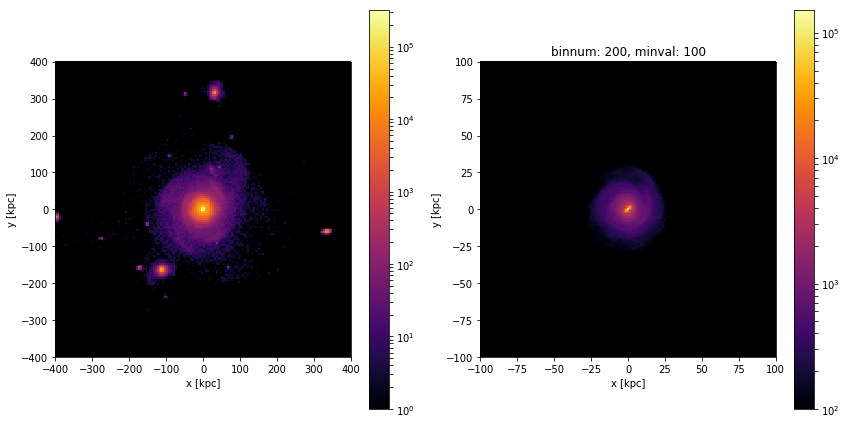

In [118]:
##### istars, = np.where( (s.type == 4) & (s.halo == 0) )#& (s.subhalo == 0))
(x, y, z), (vx, vy, vz), rxyz, rxy = get_cartesian_vectors(s, sf, istars)
xx = 0
yy = 5
binnumxx = 160
binnumyy = 100
cmap = copy.copy(plt.cm.inferno)
cmap.set_bad((0,0,0))  # Fill background with black

for j in range(80,210,30):    
    for i in range(0,110,10):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        h1 = ax1.hist2d(1000*x, 1000*y, bins=binnumxx, norm=matplotlib.colors.LogNorm(), cmap = cmap, \
                   range = [[-400,400], [-400, 400]], cmin = xx)
        h2 = ax2.hist2d(1000*x, 1000*y, bins=j, norm=matplotlib.colors.LogNorm(), cmap = cmap, \
                   range = [[-100,100], [-100, 100]], cmin = i)
        ax1.set_xlabel("x [kpc]")
        ax1.set_ylabel("y [kpc]")
        ax1.set_aspect('equal')
        ax2.set_xlabel("x [kpc]")
        ax2.set_ylabel("y [kpc]")
        ax2.set_aspect('equal')
        ax2.set_title('binnum: ' + str(j) + ', minval: ' + str(i))
        cbar1 = fig.colorbar(h1[3], ax = ax1)
        cbar2 = fig.colorbar(h2[3], ax = ax2)
        fig.tight_layout()
        #fig.show()